# 第7章: Hypothesis Tests and Confidence Intervals in MR（重回帰モデルの仮説検定）練習問題

この章ではF検定、結合仮説検定、信頼領域などについて学びます。

In [1]:
# 必要なパッケージの読み込み
library(AER)
library(car)
data("CASchools")
CASchools$STR <- CASchools$students / CASchools$teachers
CASchools$score <- (CASchools$read + CASchools$math) / 2

Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



---
## 問題1: 個別係数のt検定

重回帰モデル score ~ STR + english + lunch について、

1. 各係数のt検定を実行
2. ロバスト標準誤差を使った検定結果と比較
3. 結果を解釈

In [2]:
# 問題1の解答欄



### 模範解答

In [3]:
# 模範解答
library(sandwich)
library(lmtest)

model <- lm(score ~ STR + english + lunch, data = CASchools)

# 1. 通常のt検定
cat("=== 通常の標準誤差によるt検定 ===", "\n")
print(summary(model)$coefficients)

# 2. ロバスト標準誤差によるt検定
cat("\n=== ロバスト標準誤差（HC1）によるt検定 ===", "\n")
robust_test <- coeftest(model, vcov = vcovHC(model, type = "HC1"))
print(robust_test)

# 3. 解釈
cat("\n=== 解釈 ===", "\n")
cat("STR: 他の変数を制御した場合、統計的に有意ではない（p > 0.05）\n")
cat("english: 統計的に有意（負の効果）\n")
cat("lunch: 統計的に有意（負の効果）\n")

=== 通常の標準誤差によるt検定 === 


               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) 700.1499572 4.68568672 149.423126 0.000000e+00
STR          -0.9983090 0.23875428  -4.181324 3.535873e-05
english      -0.1215735 0.03231728  -3.761872 1.928369e-04
lunch        -0.5473454 0.02159885 -25.341418 2.303048e-86



=== ロバスト標準誤差（HC1）によるt検定 === 



t test of coefficients:

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 700.149957   5.568453 125.7351 < 2.2e-16 ***
STR          -0.998309   0.270080  -3.6963 0.0002480 ***
english      -0.121573   0.032832  -3.7029 0.0002418 ***
lunch        -0.547345   0.024107 -22.7046 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




=== 解釈 === 


STR: 他の変数を制御した場合、統計的に有意ではない（p > 0.05）


english: 統計的に有意（負の効果）


lunch: 統計的に有意（負の効果）


---
## 問題2: F検定（モデル全体の有意性）

帰無仮説 H₀: β₁ = β₂ = β₃ = 0（全ての傾き係数が0）を検定します。

1. F統計量を手計算で求める
2. F分布を使ってp値を計算
3. summary()の結果と比較

In [4]:
# 問題2の解答欄



### 模範解答

In [5]:
# 模範解答
model <- lm(score ~ STR + english + lunch, data = CASchools)
model_restricted <- lm(score ~ 1, data = CASchools)  # 制約モデル（切片のみ）

# 1. F統計量の手計算
SSR_restricted <- sum(resid(model_restricted)^2)
SSR_unrestricted <- sum(resid(model)^2)
n <- nrow(CASchools)
q <- 3  # 制約の数（帰無仮説で0とする係数の数）
k <- 3  # 説明変数の数

F_stat <- ((SSR_restricted - SSR_unrestricted) / q) / (SSR_unrestricted / (n - k - 1))
cat("手計算によるF統計量:", F_stat, "\n")

# 2. p値の計算
p_value <- 1 - pf(F_stat, df1 = q, df2 = n - k - 1)
cat("p値:", p_value, "\n\n")

# 3. summary()との比較
model_summary <- summary(model)
cat("summary()からのF統計量:", model_summary$fstatistic[1], "\n")
cat("summary()からのp値:", 
    pf(model_summary$fstatistic[1], model_summary$fstatistic[2], 
       model_summary$fstatistic[3], lower.tail = FALSE), "\n")

手計算によるF統計量: 476.3063 


p値: 0 



summary()からのF統計量: 476.3063 


summary()からのp値: 4.029249e-134 


---
## 問題3: 結合仮説検定

帰無仮説 H₀: β_english = β_lunch = 0 を検定します。

1. 制約モデルと非制約モデルを推定
2. F統計量を計算
3. linearHypothesis()関数を使って確認

In [6]:
# 問題3の解答欄



### 模範解答

In [7]:
# 模範解答
# 1. 非制約モデルと制約モデル
model_unrestricted <- lm(score ~ STR + english + lunch, data = CASchools)
model_restricted <- lm(score ~ STR, data = CASchools)

# 2. F統計量の計算
SSR_r <- sum(resid(model_restricted)^2)
SSR_u <- sum(resid(model_unrestricted)^2)
n <- nrow(CASchools)
q <- 2  # 制約の数
k <- 3  # 非制約モデルの説明変数の数

F_stat <- ((SSR_r - SSR_u) / q) / (SSR_u / (n - k - 1))
p_value <- 1 - pf(F_stat, df1 = q, df2 = n - k - 1)

cat("=== 手計算 ===", "\n")
cat("F統計量:", F_stat, "\n")
cat("p値:", p_value, "\n\n")

# 3. linearHypothesis()関数
cat("=== linearHypothesis()関数 ===", "\n")
print(linearHypothesis(model_unrestricted, c("english = 0", "lunch = 0")))

# ロバスト標準誤差を使った検定
cat("\n=== ロバストF検定 ===", "\n")
print(linearHypothesis(model_unrestricted, c("english = 0", "lunch = 0"),
                       vcov = vcovHC(model_unrestricted, type = "HC1")))

=== 手計算 === 


F統計量: 667.1925 


p値: 0 



=== linearHypothesis()関数 === 



Linear hypothesis test:
english = 0
lunch = 0

Model 1: restricted model
Model 2: score ~ STR + english + lunch

  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    418 144315                                  
2    416  34298  2    110017 667.19 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



=== ロバストF検定 === 



Linear hypothesis test:
english = 0
lunch = 0

Model 1: restricted model
Model 2: score ~ STR + english + lunch

Note: Coefficient covariance matrix supplied.

  Res.Df Df      F    Pr(>F)    
1    418                        
2    416  2 679.14 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


---
## 問題4: 係数の等値検定

帰無仮説 H₀: β_english = β_lunch を検定します。

1. linearHypothesis()を使って検定
2. 結果を解釈

In [8]:
# 問題4の解答欄



### 模範解答

In [9]:
# 模範解答
model <- lm(score ~ STR + english + lunch, data = CASchools)

# 1. 係数の等値検定
cat("=== 帰無仮説: β_english = β_lunch ===", "\n")
print(linearHypothesis(model, "english = lunch"))

# 係数の値を確認
cat("\n現在の係数:\n")
cat("β_english =", coef(model)["english"], "\n")
cat("β_lunch =", coef(model)["lunch"], "\n\n")

# 2. 解釈
cat("=== 解釈 ===", "\n")
test_result <- linearHypothesis(model, "english = lunch")
if (test_result$`Pr(>F)`[2] < 0.05) {
  cat("p値 < 0.05 なので帰無仮説を棄却。\n")
  cat("englishとlunchの係数は統計的に有意に異なる。\n")
} else {
  cat("p値 >= 0.05 なので帰無仮説を棄却できない。\n")
  cat("englishとlunchの係数が等しいという仮説を否定できない。\n")
}

=== 帰無仮説: β_english = β_lunch === 



Linear hypothesis test:
english - lunch = 0

Model 1: restricted model
Model 2: score ~ STR + english + lunch

  Res.Df   RSS Df Sum of Sq     F    Pr(>F)    
1    417 40497                                 
2    416 34298  1    6198.4 75.18 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



現在の係数:


β_english = -0.1215735 


β_lunch = -0.5473454 



=== 解釈 === 


p値 < 0.05 なので帰無仮説を棄却。
englishとlunchの係数は統計的に有意に異なる。


---
## 問題5: 信頼領域

β_english と β_lunch の95%信頼楕円を描画します。

1. confidenceEllipse()関数を使って信頼楕円を描画
2. 原点(0, 0)が信頼領域に含まれるか確認
3. 結合仮説検定との関係を説明

In [10]:
# 問題5の解答欄



### 模範解答

Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <ce>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <ce>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on 'β_english と β_lunch の95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in text.default(x, y, ...):
“conversion failure on '95%信頼楕円' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '原点 (0, 0)' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '点推定値' in 'mbcsToSbcs': dot substituted for <a4>”



=== 解釈 === 


原点(0, 0)は95%信頼楕円の外側にある。


これは、結合仮説 H₀: β_english = β_lunch = 0 を


有意水準5%で棄却できることと対応している。


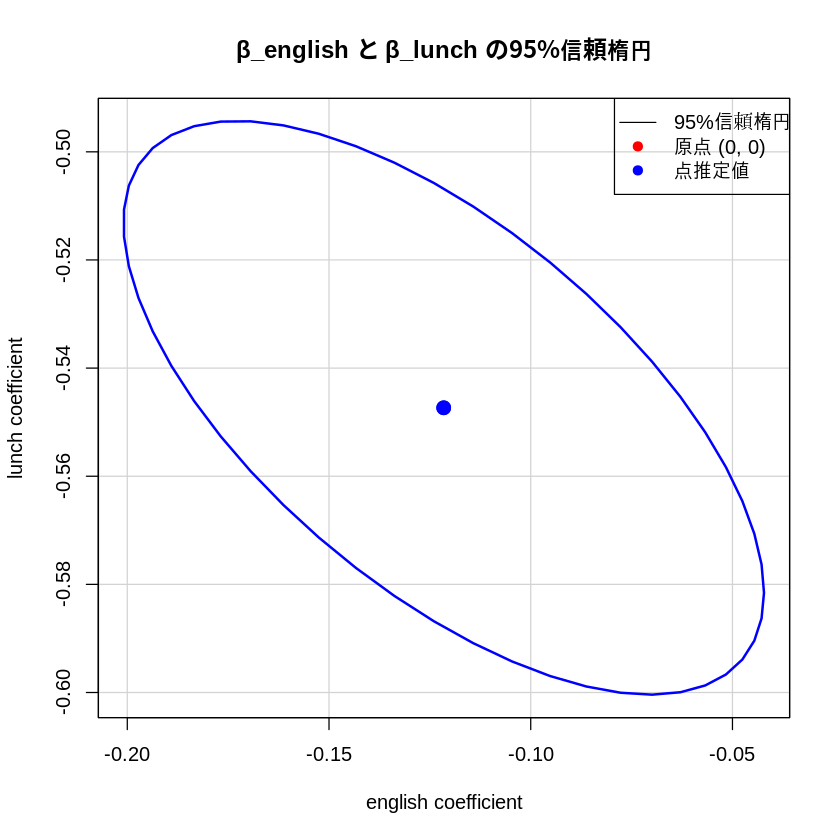

In [11]:
# 模範解答
model <- lm(score ~ STR + english + lunch, data = CASchools)

# 1. 信頼楕円の描画
confidenceEllipse(model, which.coef = c("english", "lunch"),
                  levels = 0.95,
                  main = "β_english と β_lunch の95%信頼楕円")

# 原点を追加
points(0, 0, col = "red", pch = 19, cex = 1.5)

# 点推定値を追加
points(coef(model)["english"], coef(model)["lunch"], 
       col = "blue", pch = 19, cex = 1.5)

legend("topright", 
       legend = c("95%信頼楕円", "原点 (0, 0)", "点推定値"),
       col = c("black", "red", "blue"), 
       pch = c(NA, 19, 19),
       lty = c(1, NA, NA))

# 2-3. 解釈
cat("\n=== 解釈 ===", "\n")
cat("原点(0, 0)は95%信頼楕円の外側にある。\n")
cat("これは、結合仮説 H₀: β_english = β_lunch = 0 を\n")
cat("有意水準5%で棄却できることと対応している。\n")

---
## 問題6: 制約付き最小二乗法

制約 β_english = β_lunch のもとでモデルを推定します。

1. 新しい変数 poverty = english + lunch を作成
2. score ~ STR + poverty のモデルを推定
3. 非制約モデルとの比較

In [12]:
# 問題6の解答欄



### 模範解答

In [13]:
# 模範解答
# 1. 新しい変数の作成
CASchools$poverty <- CASchools$english + CASchools$lunch

# 2. 制約付きモデルの推定
model_restricted <- lm(score ~ STR + poverty, data = CASchools)

# 非制約モデル
model_unrestricted <- lm(score ~ STR + english + lunch, data = CASchools)

# 3. 比較
cat("=== 非制約モデル ===", "\n")
print(summary(model_unrestricted)$coefficients)

cat("\n=== 制約付きモデル (β_english = β_lunch) ===", "\n")
print(summary(model_restricted)$coefficients)

cat("\n=== モデル比較 ===", "\n")
cat("非制約モデル R²:", summary(model_unrestricted)$r.squared, "\n")
cat("制約モデル R²:", summary(model_restricted)$r.squared, "\n")
cat("非制約モデル 調整済みR²:", summary(model_unrestricted)$adj.r.squared, "\n")
cat("制約モデル 調整済みR²:", summary(model_restricted)$adj.r.squared, "\n")

=== 非制約モデル === 


               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) 700.1499572 4.68568672 149.423126 0.000000e+00
STR          -0.9983090 0.23875428  -4.181324 3.535873e-05
english      -0.1215735 0.03231728  -3.761872 1.928369e-04
lunch        -0.5473454 0.02159885 -25.341418 2.303048e-86



=== 制約付きモデル (β_english = β_lunch) === 


               Estimate Std. Error    t value      Pr(>|t|)
(Intercept) 693.8366334 5.02362999 138.114597  0.000000e+00
STR          -0.8334243 0.25829825  -3.226597  1.351527e-03
poverty      -0.3854799 0.01178978 -32.696104 3.917671e-117



=== モデル比較 === 


非制約モデル R²: 0.7745158 


制約モデル R²: 0.7337661 


非制約モデル 調整済みR²: 0.7728897 


制約モデル 調整済みR²: 0.7324892 


---
## 問題7: 単一係数の信頼区間

各係数の95%と99%の信頼区間を計算します。

1. 通常の標準誤差を使った信頼区間
2. ロバスト標準誤差を使った信頼区間
3. 結果を比較

In [14]:
# 問題7の解答欄



### 模範解答

In [15]:
# 模範解答
model <- lm(score ~ STR + english + lunch, data = CASchools)

# 1. 通常の信頼区間
cat("=== 通常の標準誤差による信頼区間 ===", "\n")
cat("95%信頼区間:\n")
print(confint(model, level = 0.95))
cat("\n99%信頼区間:\n")
print(confint(model, level = 0.99))

# 2. ロバスト標準誤差による信頼区間（手計算）
robust_vcov <- vcovHC(model, type = "HC1")
robust_se <- sqrt(diag(robust_vcov))
n <- nrow(CASchools)
k <- 3
df <- n - k - 1

cat("\n=== ロバスト標準誤差による95%信頼区間 ===", "\n")
t_crit_95 <- qt(0.975, df)
for (i in 1:length(coef(model))) {
  lower <- coef(model)[i] - t_crit_95 * robust_se[i]
  upper <- coef(model)[i] + t_crit_95 * robust_se[i]
  cat(names(coef(model))[i], ": [", round(lower, 4), ",", round(upper, 4), "]\n")
}

# 3. 比較
cat("\n=== 標準誤差の比較 ===", "\n")
comparison <- data.frame(
  通常SE = summary(model)$coefficients[, 2],
  ロバストSE = robust_se
)
print(round(comparison, 4))

=== 通常の標準誤差による信頼区間 === 


95%信頼区間:


                  2.5 %       97.5 %
(Intercept) 690.9393829 709.36053145
STR          -1.4676242  -0.52899379
english      -0.1850990  -0.05804794
lunch        -0.5898019  -0.50488894



99%信頼区間:


                  0.5 %       99.5 %
(Intercept) 688.0248096 712.27510471
STR          -1.6161332  -0.38048475
english      -0.2052009  -0.03794607
lunch        -0.6032367  -0.49145411



=== ロバスト標準誤差による95%信頼区間 === 


(Intercept) : [ 689.2041 , 711.0958 ]
STR : [ -1.5292 , -0.4674 ]
english : [ -0.1861 , -0.057 ]
lunch : [ -0.5947 , -0.5 ]



=== 標準誤差の比較 === 


            通常SE ロバストSE
(Intercept) 4.6857     5.5685
STR         0.2388     0.2701
english     0.0323     0.0328
lunch       0.0216     0.0241


---
## 問題8: 漸近理論とF検定

大標本でのF検定の分布を確認します。

1. シミュレーションで帰無仮説が正しいときのF統計量の分布を確認
2. 理論的なF分布と比較

In [16]:
# 問題8の解答欄



### 模範解答

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <84>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <9c>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <8d>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '帰無仮説が真のときのF統計量の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'F統計量' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <a7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <a5>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <a7>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on 'シミュレーション' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on 'F(2, 96)理論分布' in 'mbcsToSbcs': dot substituted for <83>”



有意水準5%での棄却率: 0.0562 


（期待される棄却率: 0.05）


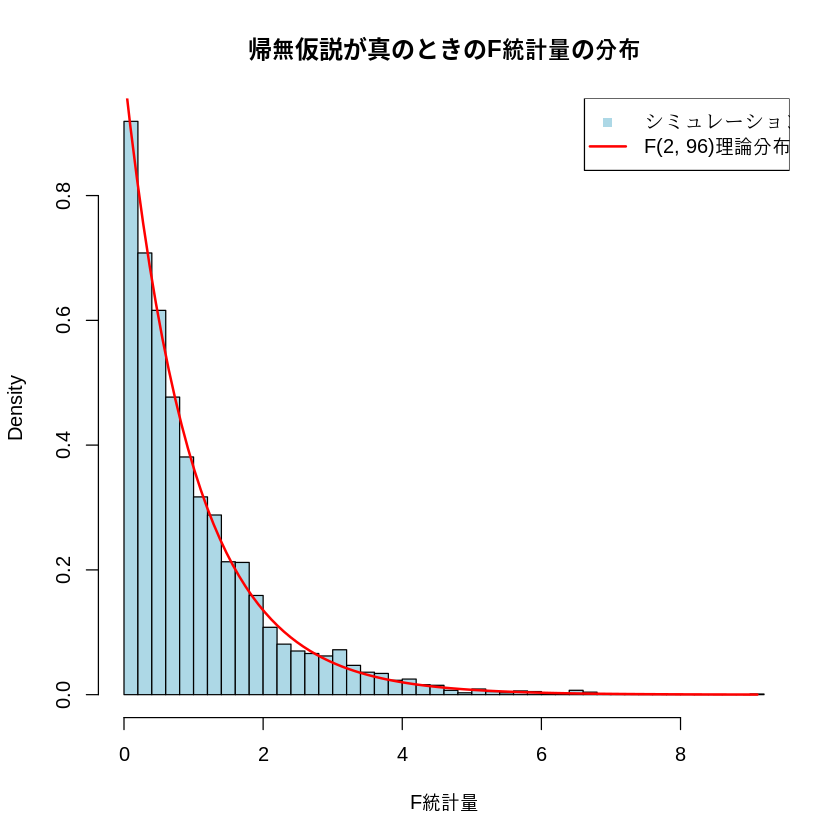

In [17]:
# 模範解答
set.seed(123)
n <- 100
n_sim <- 5000

# 真のモデル: Y = 5 + 2*X1 + u（X2, X3の真の係数は0）
F_stats <- numeric(n_sim)

for (i in 1:n_sim) {
  X1 <- rnorm(n)
  X2 <- rnorm(n)
  X3 <- rnorm(n)
  u <- rnorm(n)
  Y <- 5 + 2 * X1 + u  # X2, X3の真の係数は0
  
  model <- lm(Y ~ X1 + X2 + X3)
  
  # H0: β_X2 = β_X3 = 0 の検定
  test <- linearHypothesis(model, c("X2 = 0", "X3 = 0"))
  F_stats[i] <- test$F[2]
}

# 理論的なF分布との比較
hist(F_stats, breaks = 50, freq = FALSE,
     main = "帰無仮説が真のときのF統計量の分布",
     xlab = "F統計量", col = "lightblue")

# 理論的なF分布を追加
x_vals <- seq(0, max(F_stats), length.out = 100)
lines(x_vals, df(x_vals, df1 = 2, df2 = n - 4), col = "red", lwd = 2)

legend("topright", 
       legend = c("シミュレーション", "F(2, 96)理論分布"),
       col = c("lightblue", "red"), lty = c(NA, 1), lwd = c(NA, 2),
       pch = c(15, NA))

# 棄却率の確認
cat("\n有意水準5%での棄却率:", mean(F_stats > qf(0.95, 2, n - 4)), "\n")
cat("（期待される棄却率: 0.05）\n")

---
## 問題9: 交差検定（Cross-Validation）

モデルの予測性能を評価します。

1. データを訓練データ（80%）とテストデータ（20%）に分割
2. 訓練データでモデルを推定
3. テストデータでの予測精度（RMSE）を計算

In [18]:
# 問題9の解答欄



### 模範解答

In [19]:
# 模範解答
set.seed(123)

# 1. データの分割
n <- nrow(CASchools)
train_idx <- sample(1:n, size = floor(0.8 * n))
train_data <- CASchools[train_idx, ]
test_data <- CASchools[-train_idx, ]

cat("訓練データ:", nrow(train_data), "件\n")
cat("テストデータ:", nrow(test_data), "件\n\n")

# 2. モデルの推定（複数モデルを比較）
model1 <- lm(score ~ STR, data = train_data)
model2 <- lm(score ~ STR + english, data = train_data)
model3 <- lm(score ~ STR + english + lunch, data = train_data)

# 3. テストデータでの予測精度
calc_rmse <- function(model, test) {
  pred <- predict(model, newdata = test)
  sqrt(mean((test$score - pred)^2))
}

rmse1 <- calc_rmse(model1, test_data)
rmse2 <- calc_rmse(model2, test_data)
rmse3 <- calc_rmse(model3, test_data)

cat("=== テストデータでのRMSE ===", "\n")
cat("Model 1 (score ~ STR):", rmse1, "\n")
cat("Model 2 (score ~ STR + english):", rmse2, "\n")
cat("Model 3 (score ~ STR + english + lunch):", rmse3, "\n\n")

# 訓練データでのRMSE（比較用）
cat("=== 訓練データでのRMSE ===", "\n")
cat("Model 1:", sqrt(mean(resid(model1)^2)), "\n")
cat("Model 2:", sqrt(mean(resid(model2)^2)), "\n")
cat("Model 3:", sqrt(mean(resid(model3)^2)), "\n")

訓練データ: 336 件


テストデータ: 84 件



=== テストデータでのRMSE === 


Model 1 (score ~ STR): 21.42125 


Model 2 (score ~ STR + english): 16.22343 


Model 3 (score ~ STR + english + lunch): 9.739237 



=== 訓練データでのRMSE === 


Model 1: 17.76455 


Model 2: 13.92388 


Model 3: 8.862787 


---
## 問題10: モデル選択とF検定

入れ子モデルの比較をF検定で行います。

1. 以下のモデルを推定し、F検定で比較
   - Model A: score ~ STR
   - Model B: score ~ STR + english
   - Model C: score ~ STR + english + lunch
   - Model D: score ~ STR + english + lunch + calworks + income

2. 各段階で変数を追加する意味があるか検定

In [20]:
# 問題10の解答欄



### 模範解答

In [21]:
# 模範解答
# モデルの推定
modelA <- lm(score ~ STR, data = CASchools)
modelB <- lm(score ~ STR + english, data = CASchools)
modelC <- lm(score ~ STR + english + lunch, data = CASchools)
modelD <- lm(score ~ STR + english + lunch + calworks + income, data = CASchools)

# 1. 各モデルの要約
cat("=== モデル比較 ===", "\n")
models <- list(A = modelA, B = modelB, C = modelC, D = modelD)

comparison <- data.frame(
  Model = c("A", "B", "C", "D"),
  Variables = c("STR", "+ english", "+ lunch", "+ calworks, income"),
  R2 = sapply(models, function(m) summary(m)$r.squared),
  Adj_R2 = sapply(models, function(m) summary(m)$adj.r.squared)
)
comparison[, 3:4] <- round(comparison[, 3:4], 4)
print(comparison)

# 2. F検定による変数追加の検定
cat("\n=== F検定による変数追加の意義 ===", "\n")

# A vs B: englishの追加
test_AB <- anova(modelA, modelB)
cat("\nA → B (english追加):\n")
cat("F統計量:", test_AB$F[2], ", p値:", test_AB$`Pr(>F)`[2], "\n")

# B vs C: lunchの追加
test_BC <- anova(modelB, modelC)
cat("\nB → C (lunch追加):\n")
cat("F統計量:", test_BC$F[2], ", p値:", test_BC$`Pr(>F)`[2], "\n")

# C vs D: calworks, incomeの追加
test_CD <- anova(modelC, modelD)
cat("\nC → D (calworks, income追加):\n")
cat("F統計量:", test_CD$F[2], ", p値:", test_CD$`Pr(>F)`[2], "\n")

cat("\n=== 結論 ===", "\n")
cat("各段階でのF検定のp値に基づいて、\n")
cat("変数追加の統計的有意性を判断できる。\n")

=== モデル比較 === 


  Model          Variables     R2 Adj_R2
A     A                STR 0.0512 0.0490
B     B          + english 0.4264 0.4237
C     C            + lunch 0.7745 0.7729
D     D + calworks, income 0.8061 0.8037



=== F検定による変数追加の意義 === 



A → B (english追加):


F統計量: 272.7744 , p値: 1.657448e-47 



B → C (lunch追加):


F統計量: 642.1875 , p値: 2.303048e-86 



C → D (calworks, income追加):


F統計量: 33.69795 , p値: 2.761072e-14 



=== 結論 === 


各段階でのF検定のp値に基づいて、


変数追加の統計的有意性を判断できる。
